# DATA/MC comparison with ACPT with Awkard.JaggedArray

In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
from copy import deepcopy
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic
import seaborn as sns

import matplotlib
from matplotlib.colors import LogNorm

matplotlib.rcParams.update({'font.size': 12})

from calo_likelihood import caloLikelihood
from general_functions import *
from loaders import *
from initializers import initialisation_for_caloriemtry_acpt

/home/nic/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [3]:
today = '20_02_01'

In [4]:
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/datamc
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/calibration
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/acpt_studies_calo/datamc_cali

In [5]:
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/acpt_studies_calo/'
save_folder_datamc = save_folder+'datamc/'
save_folder_calibration = save_folder+'calibration'
save_folder_datamc_cali = save_folder+'datamc_cali/'

In [6]:
branches = [
    'run',
    'sub',
    'evt',
    
    'generation',
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
    'backtracked_start_x',
    'backtracked_start_y',
    'backtracked_start_z',
    'backtracked_start_t',
    'backtracked_sce_start_x',
    'backtracked_sce_start_y',
    'backtracked_sce_start_z',
    
    'nplanehits_U',
    'nplanehits_V',
    'nplanehits_Y',
    'trk_score',

    'trk_start_x',
    'trk_start_y',
    'trk_start_z',
    
    'trk_sce_start_x',
    'trk_sce_start_y',
    'trk_sce_start_z',

    'trk_end_x',
    'trk_end_y',
    'trk_end_z',
    
    'trk_sce_end_x',
    'trk_sce_end_y',
    'trk_sce_end_z',
    
    'trk_theta',
    'trk_phi',

    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',

    'trk_len',
    
#     'dqdx_u',
#     'dqdx_v',
#     'dqdx_y',

    'dedx_u',
    'dedx_v',
    'dedx_y',

    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
    'x_u',
    'x_v',
    'x_y',
    
    'y_u',
    'y_v',
    'y_y',
    
    'z_u',
    'z_v',
    'z_y',
    
    'dir_x_u',
    'dir_x_v',
    'dir_x_y',
    
    'dir_y_u',
    'dir_y_v',
    'dir_y_y',
    
    'dir_z_u',
    'dir_z_v',
    'dir_z_y',
]

In [7]:
file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v03/'

filenames = {
    'mc': file_folder + 'overlay_acpt/out.root',
    'data': file_folder + 'beam_off_acpt/out.root',
}

split_factor = 0.015
split_factor2 = 0.03

folder = "nuselection"
tree = "CalorimetryAnalyzer"

root_file_mc = uproot.open(filenames['mc'])[folder][tree]
entry_split_mc = int(len(root_file_mc) * split_factor)
entry_split_mc2 = int(len(root_file_mc) * split_factor2)
array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc, entrystop=entry_split_mc2)

root_file_data = uproot.open(filenames['data'])[folder][tree]
entry_split_data = int(len(root_file_data) * split_factor)
entry_split_data2 = int(len(root_file_data) * split_factor2)
array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data, entrystop=entry_split_data2)

In [ ]:
root_file_data.numentries

In [ ]:
# file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v04_david/'

# filenames = {
#     'mc': file_folder + 'overlay_acpt/out.root',
# #     'data': file_folder + 'beam_off_acpt/out.root',
# }

# split_factor = 0.005
# split_factor2 = 0.01

# folder = "nuselection"
# tree = "CalorimetryAnalyzer"

# root_file_mc = uproot.open(filenames['mc'])[folder][tree]
# entry_split_mc = int(len(root_file_mc) * split_factor)
# entry_split_mc2 = int(len(root_file_mc) * split_factor2)
# array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
# array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc, entrystop=entry_split_mc2)

# # root_file_data = uproot.open(filenames['data'])[folder][tree]
# # entry_split_data = int(len(root_file_data) * split_factor)
# # entry_split_data2 = int(len(root_file_data) * split_factor2)
# # array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
# # array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data, entrystop=entry_split_data2)

In [8]:
for i, array in enumerate([array_mc_train, array_mc_test, array_data_train, array_data_test]):
# for i, array in enumerate([array_mc_train, array_mc_test]):
    initialisation_for_caloriemtry_acpt(array)

/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
def selection_base(array):
    mask = (array['trk_len'] > 0) & (array['trk_dir_y']<=0)
    return mask

def selection_mask_old(array):
    mask = selection_base(array)
    for plane in ['_u', '_v', '_y']:
        for direction in ['_x', '_y', '_z']:
            mask = mask & (  (np.isnan(array['dir'+direction+plane]) == False).all() )
    mask = mask
    return mask

def selection_mask(array):
    mask = selection_base(array)
    for plane in ['_u', '_v', '_y']:
        unit_v = np.sqrt(array['dir_z'+plane]**2 + array['dir_x'+plane]**2 + array['dir_y'+plane]**2)
        mask = mask &\
              (unit_v > 0.999).all() &\
              (unit_v < 1.001).all()
    return mask

def selection_efficiency(array):
    base_mask = selection_base(array)
    array_len = len(base_mask)
    print("base selection eff = {:.3f}".format(base_mask.sum()/array_len))
    
    sel_mask = selection_mask(array)
    print("complete selection eff = {:.3f}".format(sel_mask.sum()/array_len))
    print(sel_mask.sum(), array_len)
    
def selection_planes(array):
    aux = []
    for plane in ['_u', '_v', '_y']:
        aux.append(array['first_last_hit_mask'+plane])
    return aux

In [10]:
array_data_train['norm_dir_y']

<JaggedArray [[1.0 1.0 0.99999994 ... 1.0 1.0 1.0] [1.0 1.0 1.0 ... 1.0 1.0 1.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.99999994 1.0000001 1.0 ... 0.99999994 1.0 1.0] [1.0000001 1.0 1.0 ... 0.99999994 1.0 1.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] at 0x7f5adefa96d0>

In [11]:
array_data_train['dir_x_y'], array_data_train['dir_y_y'], array_data_train['dir_z_y']

(<JaggedArray [[-0.533963 -0.53602445 -0.53989375 ... -0.59149396 -0.59430027 -0.5985296] [0.38079575 0.37901002 0.37248218 ... 0.3232286 0.3224344 0.32240048] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [-0.5760292 -0.576404 -0.5764295 ... -0.5628081 -0.562486 -0.5627453] [0.735746 0.7360103 0.73747456 ... 0.6997888 0.6990748 0.6986788] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] at 0x7f5adef98ad0>,
 <JaggedArray [[-0.079253055 -0.089646734 -0.10946527 ... -0.35996988 -0.35042256 -0.34047866] [-0.7910484 -0.79179513 -0.7946088 ... -0.8271527 -0.8274293 -0.8274282] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [-0.80153435 -0.8013755 -0.8013662 ... -0.8191723 -0.8197061 -0.81989455] [-0.64298815 -0.6427254 -0.64120656 ... -0.68369067 -0.68410575 -0.684343] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] at 0x7f5adef98a10>,
 <JaggedArray [[-0.84178525 -0.83942914 -0.83458495 ... -0.72149616 -0.7238862 -0.725146] [-0.47878703 -0.47896957 -0.47943097 ... -0.45971918 -0.45977914 -0.45980483] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.1604152 0.15

In [12]:
selection_efficiency(array_mc_train)

base selection eff = 0.999
complete selection eff = 0.848
2982 3517


/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in greater
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/nic/.local/lib/python3.7/site-packages/awkward/array/jagged.py:1035: RuntimeWarning: invalid value encountered in less
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
selection_efficiency(array_data_train)

base selection eff = 0.999
complete selection eff = 0.856
2399 2802


In [14]:
((np.abs(array_data_train['norm_dir_y'] -1) > 0.0001).any()).sum() / len(((np.abs(array_data_train['norm_dir_y'] -1) > 0.0001).any()))

0.12134189864382584

In [15]:
((np.abs(array_data_train['norm_dir_u'] -1) > 0.0001).any()).sum() / len(((np.abs(array_data_train['norm_dir_u'] -1) > 0.0001).any()))

0.1238401142041399

In [16]:
((np.abs(array_data_train['norm_dir_v'] -1) > 0.0001).any()).sum() / len(((np.abs(array_data_train['norm_dir_v'] -1) > 0.0001).any()))

0.12919343326195576

In [17]:
array_data_train['dir_y_v'][(np.abs(array_data_train['norm_dir_v'] -1) > 0.0001).any()]

<JaggedArray [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [-0.8155424 -0.8155424 -0.8155424 ... -0.8155424 -0.8155424 -0.8155424] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] at 0x7f5adefe0890>

In [18]:
array_data_train['pitch_v'][(np.abs(array_data_train['norm_dir_v'] -1) > 0.0001).any()]

<JaggedArray [[0.33872405 0.33839533 0.33823022 ... 0.34318057 0.34320775 0.3432654] [169.63127 107.28112 97.41531 ... 1.9335806 1.9848397 1.9975917] [0.3209913 0.32096425 0.320962 ... 0.31555644 0.3155478 0.31554836] ... [0.30627495 0.30623004 0.30582342 ... 0.31156498 0.3115989 0.3117314] [0.4391729 0.43930155 0.5174549 ... 0.4320928 0.4296815 0.4251652] [0.4468995 0.44754547 0.4481189 ... 0.45074588 0.44970614 0.44951347]] at 0x7f5adefe0a50>

In [19]:
muon_train = (abs(array_mc_train['backtracked_pdg']) == 13) & selection_mask(array_mc_train)
muon_test = (abs(array_mc_test['backtracked_pdg']) == 13) & selection_mask(array_mc_test)

data_train_mask = selection_mask(array_data_train)
data_test_mask = selection_mask(array_data_test)

mc_train_planes = selection_planes(array_mc_train)
mc_test_planes = selection_planes(array_mc_test)

data_train_planes = selection_planes(array_data_train)
data_test_planes = selection_planes(array_data_test)

In [20]:
# parameters = [['abs_theta_x_u', 'abs_theta_yz_u'],
#               ['abs_theta_x_v', 'abs_theta_yz_v'],
#               ['abs_theta_x_y', 'abs_theta_yz_y'],]
# parameters_legend_names = [[r'$\theta_{x}$ - U', r'$\theta_{yz}$ - U'],
#                            [r'$\theta_{x}$ - V', r'$\theta_{yz}$ - V'],
#                            [r'$\theta_{x}$ - Y', r'$\theta_{yz}$ - Y'],]
# parameters_bin_edges = [np.linspace(0, np.pi/2, 7), np.linspace(0, np.pi/2, 9)]
# dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
# dedx_bins = np.linspace(0, 10, 100)
# pdgcode_var = 'backtracked_pdg'

In [21]:
# parameters = [['abs_theta_y_u', 'abs_theta_xz_u'],
#               ['abs_theta_y_v', 'abs_theta_xz_v'],
#               ['abs_theta_y_y', 'abs_theta_xz_y'],]
# parameters_legend_names = [[r'$\theta_{y}$ - U', r'$\theta_{xz}$ - U'],
#                            [r'$\theta_{y}$ - V', r'$\theta_{xz}$ - V'],
#                            [r'$\theta_{y}$ - Y', r'$\theta_{xz}$ - Y'],]
# parameters_bin_edges = [np.linspace(0, np.pi/2, 7), np.linspace(0, np.pi/2, 9)]
# dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
# dedx_bins = np.linspace(0, 10, 100)
# pdgcode_var = 'backtracked_pdg'

In [22]:
parameters = [['abs_theta_z_u', 'abs_theta_yx_u'],
              ['abs_theta_z_v', 'abs_theta_yx_v'],
              ['abs_theta_z_y', 'abs_theta_yx_y'],]
parameters_legend_names = [[r'$\theta$', r'$\phi$'],
                           [r'$\theta$', r'$\phi$'],
                           [r'$\theta$', r'$\phi$'],]
parameters_bin_edges = [[0., 0.52359878, 0.78539816, 1.04719755, 1.30899694, 1.57079633], np.linspace(0, np.pi/2, 9)]
dedx_vars = ['dedx_u', 'dedx_v', 'dedx_y']
dedx_bins = np.linspace(0, 10, 100)
pdgcode_var = 'backtracked_pdg'

In [23]:
caloLike_calibration = caloLikelihood(array_mc_train, quality_mask=muon_train, quality_masks_planes=mc_train_planes)
caloLike_calibration.loadData(array_data_train, overall_data_mask=data_train_mask, overall_data_masks_planes=data_train_planes)

In [24]:
caloLike_calibration.setPdgCodeVar(pdgcode_var)
for i in [0, 1, 2]:
    caloLike_calibration.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])
    
    caloLike_calibration.buildLookUpTableMC(i, 13)
    caloLike_calibration.buildLookUpTableData(i, 'default')

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist_total/hist_partial[..., np.newaxis],


In [ ]:
caloLike_calibration.plotLookUpDedxDataMC(plane_num=0,
                        pdg_code=13, 
                        data_selection='default',
                        parameters_value=[0.8, 0.9],
                        add_to_title='Calibration sample')

In [ ]:
# for plane_num in [0, 1, 2]:
#     bin_centers = product(*caloLike_calibration.parameters_bin_centers[plane_num])
#     for bin_center in bin_centers:
#         caloLike_calibration.plotLookUpDedxDataMC(plane_num=plane_num,
#                         pdg_code=13, 
#                         data_selection='default', 
#                         parameters_value=bin_center,
#                         add_to_title='Calibration sample')
#         plt.savefig(save_folder_datamc+'plane_{}_theta_{:.2f}_phi_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
#         plt.close()

In [ ]:
# plane_num = 2
# bin_centers = product(*caloLike_calibration.parameters_bin_centers[plane_num])
# for bin_center in bin_centers:
#     caloLike_calibration.plotLookUpDedxDataMC(plane_num=plane_num,
#                     pdg_code=13, 
#                     data_selection='default', 
#                     parameters_value=bin_center,
#                     add_to_title='Calibration sample')
#     plt.savefig(save_folder_datamc+'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
#     plt.tight_layout()
#     plt.close()

## Calibration only mu

In [25]:
def scale_calibration(mu, dedx):
    return dedx * mu[0]

In [26]:
caloLike_calibration.setCalibrationFunction(calibration_function=scale_calibration, 
                                n_calibration_parameters=1)

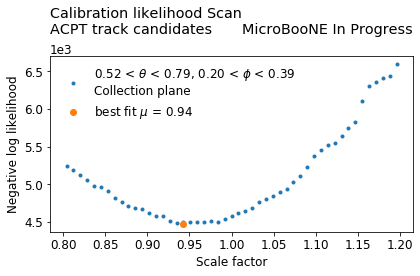

In [29]:
caloLike_calibration.calibrationLikelihoodProfile(plane_num=2, 
                                                  parameters_value=[0.6, 0.2], 
                                                  pdg_code=13, 
                                                  start_point=[1],
                                                  data_selection='default', 
                                                  plot=True,
                                                  mu_binnings=[[0.8, 1.2, 50]])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
# plt.savefig(save_folder+'plane_2_pitch_0.75.png', dpi=250)

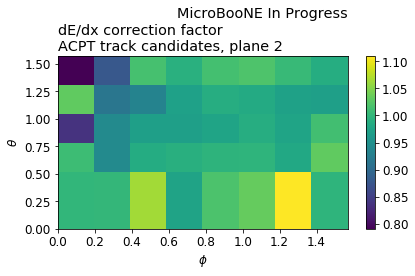

In [30]:
mu_scan_binning = [[0.8, 1.3, 50]]
for plane in [0, 1, 2]:
    caloLike_calibration.buildCalibrationTable(mu_scan_binning=mu_scan_binning, 
                          plane_num=plane, 
                          pdg_code=13, 
                          start_point=[1],
                          data_selection='default', 
                          plot_folder=save_folder_calibration)
    edges, table = caloLike_calibration.plotCalibration2d(plane)
    plt.savefig(save_folder+'calibration_table_plane_{}.png'.format(plane), dpi=200)

In [31]:
mu_scan_binning = [[0.8, 1.2, 50]]
caloLike_calibration.buildCalibrationTable(mu_scan_binning=mu_scan_binning, 
                          plane_num=2, 
                          pdg_code=13, 
                          start_point=[1],
                          data_selection='default', 
                          plot_folder=save_folder_calibration)

In [32]:
# edges, table = caloLike_calibration.plotCalibration2d(2)
# plt.savefig(save_folder+'calibration_table_plane2.png', dpi=200)

In [33]:
# for i in [0, 1, 2]:
#     caloLike_test.buildLookupTableMC(i, 13, cali=True)
#     caloLike_test.buildLookupTableData(i, 'default')

In [34]:
# plane_num = 2
# caloLike_test.calibration_table = caloLike_calibration.calibration_table
# caloLike_test.buildLookUpTableMC(plane_num, 13, cali=True)
# caloLike_test.buildLookUpTableData(plane_num, 'default')

# bin_centers = product(*caloLike_test.parameters_bin_centers[plane_num])
# for bin_center in bin_centers:
#     caloLike_test.plotLookUpDedxDataMC(plane_num=plane_num,
#                     pdg_code=13, 
#                     data_selection='default', 
#                     parameters_value=bin_center,
#                     add_to_title='Calibrated sample')
#     plt.savefig(save_folder_datamc_cali+'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.png'.format(plane_num, bin_center[0], bin_center[1]), dpi=200)
#     plt.tight_layout()
#     plt.close()

In [35]:
#print table
caloLike_calibration.printCplusplusCorrection(filename='/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/larsoft_dev/LLRPID_correction_lookup.h', planes=[0, 1, 2])

In [48]:
#dump calibration object
caloLike_calibration.save(filename='/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/dumped_objects/calibration.dat')

### Dump, load and closure test calibration

In [41]:
#1
caloLike_dump_test1 = caloLikelihood(array_mc_test, quality_mask=muon_test, quality_masks_planes=mc_test_planes)
caloLike_dump_test1.setPdgCodeVar(pdgcode_var)
i=1
caloLike_dump_test1.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], np.linspace(0, 10000, 100), parameters_legend_names[i])
caloLike_dump_test1.setCalibrationFunction(calibration_function=scale_calibration, n_calibration_parameters=1)
caloLike_dump_test1.calibration_table = caloLike_calibration.calibration_table
caloLike_dump_test1.buildLookUpTableMC(i, 13, cali=True)

array_dedx_out
274874
0.12482192105380818
9333.149141073229
[1.50379371 1.8093936  1.71154798 ... 2.41094009 2.02826758 2.14731425]


In [50]:
#2
caloLikelihood_cali_trail = caloLikelihood(None)
caloLikelihood_cali_trail.load(filename='/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/dumped_objects/calibration.dat')
array_mc_test['dedx_v_cali'] = caloLikelihood_cali_trail.calibrateDedxExternal(array_mc_test, 1)
caloLike_dump_test2 = caloLikelihood(array_mc_test, quality_mask=muon_test, quality_masks_planes=mc_test_planes)
caloLike_dump_test2.setPdgCodeVar(pdgcode_var)
i=1
caloLike_dump_test2.setVariablesBinning(i, parameters[i], parameters_bin_edges, 'dedx_v_cali', np.linspace(0, 10000, 100), parameters_legend_names[i])
caloLike_dump_test2.buildLookUpTableMC(i, 13, cali=False)

array_dedx_out
274874
0.12482192105380818
9333.149141073229
[1.50379371 1.8093936  1.71154798 ... 2.41094009 2.02826758 2.14731425]


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:182: RuntimeWarning: invalid value encountered in greater
  np.where((parameter_value>parameter_bin_edges[0]) & (parameter_value<parameter_bin_edges[-1]),
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:182: RuntimeWarning: invalid value encountered in less
  np.where((parameter_value>parameter_bin_edges[0]) & (parameter_value<parameter_bin_edges[-1]),
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:184: RuntimeWarning: invalid value encountered in less_equal
  np.where((parameter_value<=parameter_bin_edges[0]),


In [43]:
(caloLike_dump_test1.lookup_tables[13][1] - caloLike_dump_test2.lookup_tables[13][1]).any()

False

## Calibration mu + sigma

In [102]:
def scale_calibration(mu, dedx):
    scale = np.clip(mu[0], 0, np.inf)
    smearing = np.clip(mu[1], 0, np.inf)
    if type(dedx) is np.ndarray:
        return scale * dedx + np.random.normal(loc=0.0, scale=smearing, size=len(dedx))
    else:
        return scale * dedx + np.random.normal(loc=0.0, scale=smearing)

In [104]:
caloLike_calibration.setCalibrationFunction(calibration_function=scale_calibration, 
                                n_calibration_parameters=2)

caloLike_test.setCalibrationFunction(calibration_function=scale_calibration, 
                                n_calibration_parameters=2)

NameError: name 'caloLike_test' is not defined

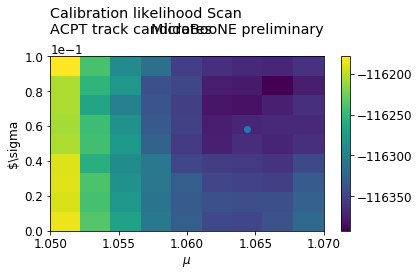

In [127]:
caloLike_calibration.calibrationLikelihoodProfile(plane_num=0, 
                                      parameters_value=[0.8, 0.9], 
                                      pdg_code=13, 
                                      data_selection='default', 
                                      start_point=[1, 0.06],
                                      plot=True,
                                      mu_binnings=[[1.05, 1.07, 10], [0.0, 0.1, 10]])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
# plt.savefig(save_folder+'plane_2_pitch_0.75.png', dpi=250)

/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


(0.5, 2)

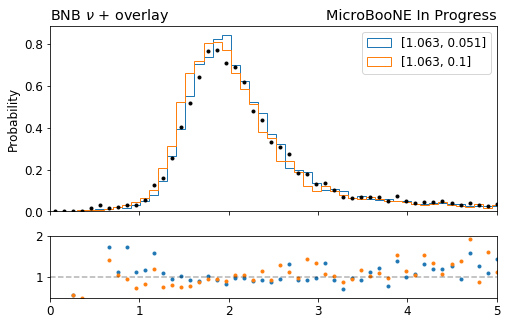

In [113]:
def mask(array):
    return (array['abs_theta_z_u'] > 0.78539816) &\
           (array['abs_theta_z_u'] < 1.04719755) &\
           (array['abs_theta_yx_u'] > 0.78539816) &\
           (array['abs_theta_yx_u'] < 0.9817477)

kwargs = {'histtype' : 'step'}
plane_num = 0
dedx_bins_edges = caloLike_calibration.dedx_bin_edges[plane_num]
dedx_bins_centers = caloLike_calibration.dedx_bins_centers[plane_num]

fig, ax = plt.subplots(ncols=1,
                       nrows=2,
                       figsize=(8, 5),
                       sharex='col',
                       gridspec_kw={'height_ratios': [3, 1]})

plt.sca(ax[0])
# bin_contents0 = caloLike_calibration.plotVariableMC(var_name='dedx_u', 
#                                     bins=dedx_bins_edges, 
#                                     range=[0, 10], 
#                                     function_mask=mask, 
#                                     quality_mask=True, 
#                                     label='[1., 0.]', 
#                                     cali_pars=[1., 0.],
#                                    **kwargs)

bin_contents1 = caloLike_calibration.plotVariableMC(var_name='dedx_u', 
                                    bins=dedx_bins_edges, 
                                    range=[0, 10], 
                                    function_mask=mask, 
                                    quality_mask=True, 
                                    label='[1.063, 0.051]', 
                                    cali_pars=[1.063, 0.051],
                                   **kwargs)

bin_contents2 = caloLike_calibration.plotVariableMCFancy(var_name='dedx_u', 
                                    bins=dedx_bins_edges, 
                                    range=[0, 10], 
                                    function_mask=mask, 
                                    quality_mask=True, 
                                    label='[1.063, 0.1]', 
                                    cali_pars=[1.03, 0.1],
                                        **kwargs)

bin_centers, bin_edges, bin_contents_data = caloLike_calibration.plotVariableData(var_name='dedx_u', 
                                    bins=dedx_bins_edges, 
                                    range=[0, 10], 
                                    function_mask=mask, 
                                    label='data');

plt.xlim(0, 5)
plt.sca(ax[1])
# plt.plot(bin_centers, bin_contents_data/bin_contents0, '.', label='[1., 0.]')
plt.plot(bin_centers, bin_contents_data/bin_contents1, '.')
plt.plot(bin_centers, bin_contents_data/bin_contents2, '.')
plt.plot([dedx_bins_edges[0], dedx_bins_edges[-1]], [1, 1], '--k', alpha=0.3)
plt.ylim(0.5, 2)

## Plot pdf before and after

In [35]:
caloLike_test = caloLikelihood(array_mc_test, quality_mask=muon_test, quality_masks_planes=mc_test_planes)
caloLike_test.loadData(array_data_test, overall_data_mask=data_test_mask, overall_data_masks_planes=data_test_planes)

caloLike_test2 = caloLikelihood(array_mc_test, quality_mask=muon_test, quality_masks_planes=mc_test_planes)
caloLike_test2.loadData(array_data_test, overall_data_mask=data_test_mask, overall_data_masks_planes=data_test_planes)

In [36]:
caloLike_test.setPdgCodeVar(pdgcode_var)
caloLike_test2.setPdgCodeVar(pdgcode_var)

for i in [0, 1, 2]:
    caloLike_test.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])
    caloLike_test2.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins, parameters_legend_names[i])
    
    caloLike_test.buildLookUpTableMC(i, 13)
    caloLike_test.buildLookUpTableData(i, 'default')

In [37]:
caloLike_test2.setCalibrationFunction(calibration_function=scale_calibration, 
                                n_calibration_parameters=1)
caloLike_test2.calibration_table = caloLike_calibration.calibration_table
caloLike_test2.buildLookUpTableMC(2, 13, cali=True)

In [42]:
plane_num = 2
bins = 101

bin_centers = product(*caloLike_test.parameters_bin_centers[plane_num])
for bin_center in bin_centers:

    fig, ax = plt.subplots(ncols=1,
                                   nrows=2,
                                   figsize=(6.5, 5),
                                   sharex='col',
                                   gridspec_kw={'height_ratios': [3, 1]})

    plt.sca(ax[0])

    bin_contents_mc = caloLike_test.plotLookUpDedxMC(plane_num=2,
                            pdg_code=13, 
                            parameters_value=bin_center, 
                            label='simulation')

    bin_contents_mc_cali = caloLike_test2.plotLookUpDedxMCfancy(plane_num=2,
                            pdg_code=13, 
                            parameters_value=bin_center,
                            title_left='Cosmic ray candidates\n', 
                            label='simulation corrected')

    bin_contents_data = caloLike_test.plotLookUpDedxData(plane_num=2,
                            data_selection='default', 
                            parameters_value=bin_center)

    dedx_bins_centers = caloLike_test.dedx_bins_centers[plane_num]
    dedx_bins_edges = caloLike_test.dedx_bin_edges[plane_num]
    plt.legend()
    plt.xlabel('')
    plt.xlim(0, 4)
    plt.sca(ax[1])
    plt.plot(dedx_bins_centers, bin_contents_data/bin_contents_mc, '.', label='mc')
    plt.plot(dedx_bins_centers, bin_contents_data/bin_contents_mc_cali, '.', label='mc corrected')
    plt.plot([dedx_bins_edges[0], dedx_bins_edges[-1]], [1, 1], '--k', alpha=0.3)
    plt.ylim(0.5, 2)
    plt.xlabel('dE/dx [MeV/cm]')
    plt.ylabel('Data/Simulation')
    plt.tight_layout()
    plt.savefig(save_folder_datamc_cali +'plane_{}_theta_y_{:.2f}_theta_xz_{:.2f}.pdf'.format(plane_num, bin_center[0], bin_center[1]))
    plt.close()

/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value

# Studies for pitch dependence for small pitch

In [33]:
dedx_binning = [0, 4]
dedx_n_bins = 150
pitch_binning = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

sel_mc = muon_train & mc_train_planes[2] & (array_mc_train['dedx_y']>0) & (array_mc_train['dedx_y']<4)
sel_data = data_train_mask & data_train_planes[2] & (array_data_train['dedx_y']>0) & (array_data_train['dedx_y']<4)

for array, sel, name in zip([array_mc_train, array_data_train], [sel_mc, sel_data], ['simulation', 'data']):
    for pitch_bin in zip(pitch_binning[:-1], pitch_binning[1:]):
        pitch_mask = (array['pitch_y'] > pitch_bin[0]) & (array['pitch_y'] <= pitch_bin[1])
        
        dedx = array['dedx_y'][pitch_mask & sel].flatten()
        
        sns.distplot(dedx, hist=False, kde=True,
                 kde_kws={'linewidth': 1},
                 label='{:.2g} < pitch < {:.2g}'.format(pitch_bin[0], pitch_bin[1]), norm_hist=True,
                 hist_kws={"range": [0, 4]})
        
#         plt.hist(dedx, bins=dedx_n_bins, range=dedx_binning, density=True,
#                  label='{:.2g} < pitch < {:.2g}'.format(pitch_bin[0], pitch_bin[1]), histtype='step')
    
    plt.title('ACPT candidates in {}\n'.format(name)+
              'collection plane hits\n', loc='left')
    plt.title('MicroBooNE In Progress', loc='right')
#     plt.xlim(0, 4)  
    plt.xlabel('dE/dx [MeV/cm]')
    plt.ylabel('Probability density [1/(MeV/cm)]')
    plt.legend()
    plt.tight_layout()
    plt.savefig(save_folder+'dedx_different_pitch_{}.png'.format(name), dpi=250)
    plt.close()

# Studies for pitch-pitch_dir and x, y, z

In [19]:
array = array_mc_train
muon_mask = muon_train
mask = array['rr_y'][muon_mask].min() == array['rr_y'][muon_mask]

In [20]:
plt.hist2d(array['x_y'][muon_mask][mask].flatten(), array['y_y'][muon_mask][mask].flatten(), range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\nlast point of each track\nPandoraTrackCaliSCE - anab::calorimetry\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_mc_last_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_end_x'][muon_mask], array['trk_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\ntrack end point\nPandoraTrack - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_mc_trk_end_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_sce_end_x'][muon_mask], array['trk_sce_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\ntrack end point SCE corrected\nPandoraTrack - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_mc_trk_end_point_sce.png', dpi=250)
plt.close()

In [21]:
array = array_data_train
muon_mask = data_train_mask
mask = array['rr_y'][muon_mask].min() == array['rr_y'][muon_mask]

NameError: name 'array_data_train' is not defined

In [216]:
plt.hist2d(array['x_y'][muon_mask][mask].flatten(), array['y_y'][muon_mask][mask].flatten(), range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('Beam OFF data ACPT candidates\nlast point of each track\nPandoraTrackCaliSCE - anab::calorimetry\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_data_last_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_end_x'][muon_mask], array['trk_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('Beam OFF data ACPT candidates\ntrack end point\nPandoraTrack - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_data_trk_end_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_sce_end_x'][muon_mask], array['trk_sce_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('Beam OFF data ACPT candidates\ntrack end point SCE corrected\nPandoraTrack - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_xy_acpt_data_trk_end_point_sce.png', dpi=250)
plt.close()

In [24]:
array = array_mc_train
muon_mask = muon_train
plt.hist(array['pitch_y'][muon_train].flatten() - np.abs(array['dir_pitch_y'][muon_train]).flatten(), bins=51, range=[-0.1, 0.1]);
plt.ylabel('Number of entries')
plt.xlabel('pitch from calo object - pitch recomputed from direction [cm]')
plt.title('Simulated ACPT candidates\npitch difference - Y plane\nPandoraTrack - recob::track\nPandoraTrackCaliSCE - anab::calorimetry\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_track_acpt_mc_pitch_difference.png', dpi=250)
plt.close()

## for the pandora (not pandora track)

In [194]:
array = array_mc_train
muon_mask = muon_train
mask = array['rr_y'][muon_mask].min() == array['rr_y'][muon_mask]

In [195]:
plt.hist2d(array['x_y'][muon_mask][mask].flatten(), array['y_y'][muon_mask][mask].flatten(), range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\nlast point of each track\nPandoraCaliSCE - anab::calorimetry\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_xy_acpt_mc_last_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_end_x'][muon_mask], array['trk_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\ntrack end point\nPandora - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_xy_acpt_mc_trk_end_point.png', dpi=250)
plt.close()

plt.hist2d(array['trk_sce_end_x'][muon_mask], array['trk_sce_end_y'][muon_mask], range=[[-10, 280], [-120, -50]], bins=[100, 100]);
plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')
plt.title('simulated ACPT candidates\ntrack end point SCE corrected\nPandora - recob::track\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_xy_acpt_mc_trk_end_point_sce.png', dpi=250)
plt.close()

In [196]:
array = array_mc_train
muon_mask = muon_train
plt.hist(array['pitch_y'][muon_train].flatten() - np.abs(array['dir_pitch_y'][muon_train]).flatten(), bins=51, range=[-0.1, 0.1]);
plt.ylabel('Number of entries')
plt.xlabel('pitch from calo object - pitch recomputed from direction [cm]')
plt.title('Simulated ACPT candidates\npitch difference - Y plane\nPandora - recob::track\nPandoraCaliSCE - anab::calorimetry\nMicroBooNE Preliminary', loc='left')
plt.tight_layout()
plt.savefig(save_folder+'pandora_acpt_mc_pitch_difference.png', dpi=250)
plt.close()

# OLD

## Compute likelihood and plot

In [82]:
caloLike_calibration.buildLookUpTableMC(i, 13, cali=True)

In [83]:
plane_num = 2
array = caloLike_test.array
array['like_13_{}'.format(i)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=False                                          
                                  )
array['like_13_sum_{}'.format(plane_num)] = array['like_13_{}'.format(plane_num)].sum()
array['like_13_sum_atan_{}'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}'.format(plane_num)])

array['like_13_{}_cali'.format(plane_num)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=True                                     
                                  )
array['like_13_sum_{}_cali'.format(plane_num)] = array['like_13_{}_cali'.format(plane_num)].sum()
array['like_13_sum_atan_{}_cali'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}_cali'.format(plane_num)])

array = caloLike_test.array_data
array['like_13_{}'.format(i)] = caloLike_calibration.likelihoodWholeDataset(array, 
                                  plane_num=plane_num, 
                                  pdg_code=13,
                                  cali=False                                          
                                  )
array['like_13_sum_{}'.format(plane_num)] = array['like_13_{}'.format(plane_num)].sum()
array['like_13_sum_atan_{}'.format(plane_num)] = 2/np.pi*np.arctan(array['like_13_sum_{}'.format(plane_num)])

In [84]:
parameters_bin_edges

[array([0.        , 0.26179939, 0.52359878, 0.78539816, 1.04719755,
        1.30899694, 1.57079633]),
 array([0.        , 0.19634954, 0.39269908, 0.58904862, 0.78539816,
        0.9817477 , 1.17809725, 1.37444679, 1.57079633])]

/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/home/nic/.local/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, 'Data/MC')

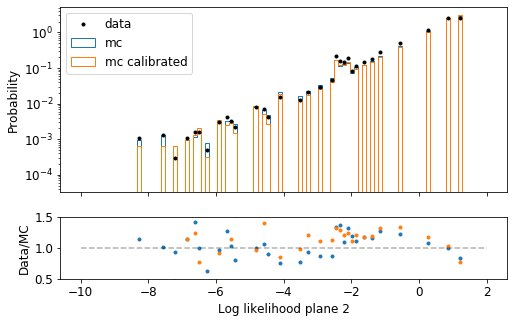

In [94]:
plane_num = 2
bins = 101
range = [-10, 2]
var_name = 'like_13_{}'.format(plane_num)

def mask_theta_phi(array):
    return (array['abs_theta_y_y'] > 1.04719755) &\
           (array['abs_theta_y_y'] < 1.30899694) &\
           (array['abs_theta_xz_y'] > 1.37444679) &\
           (array['abs_theta_xz_y'] < 1.57079633)
function_mask = mask_theta_phi

fig, ax = plt.subplots(ncols=1,
                               nrows=2,
                               figsize=(8, 5),
                               sharex='col',
                               gridspec_kw={'height_ratios': [3, 1]})

plt.sca(ax[0])
bin_contents_mc = caloLike_test.plotVariableMC(var_name, 
                                      bins, 
                                      range, 
                                      function_mask, 
                                      quality_mask=True, 
                                      label='mc', 
                                      histtype='step',
                                      log=True)
bin_contents_mc_cali = caloLike_test.plotVariableMC(var_name+'_cali', 
                                      bins, 
                                      range, 
                                      function_mask, 
                                      quality_mask=True, 
                                      label='mc calibrated', 
                                      histtype='step')
bin_centers, bin_edges, bin_contents_data = caloLike_test.plotVariableData(var_name, 
                                          bins, 
                                          range, 
                                          function_mask, 
                                          data_selection='default', 
                                          label='data')
plt.legend()
plt.sca(ax[1])
plt.plot(bin_centers, bin_contents_data/bin_contents_mc, '.', label='mc')
plt.plot(bin_centers, bin_contents_data/bin_contents_mc_cali, '.', label='mc calibrated')
plt.plot([range[0], range[-1]], [1, 1], '--k', alpha=0.3)
plt.ylim(0.5, 1.5)
plt.xlabel('Log likelihood plane 2')
plt.ylabel('Data/MC')

## Little study horizontal and vertical tracks

In [ ]:
vertical = array_mc_train['dedx_y'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9) & 
                                    (abs(array_mc_train['trk_dir_x']) < 0.05)].flatten()
horizontal = array_mc_train['dedx_y'][muon_train & 
                                      (abs(array_mc_train['trk_dir_x'])> 0.9)].flatten()

In [ ]:
binning = [100, 0, 5]
plt.hist(vertical, 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='|direction y| > 0.9 & |direction x| < 0.05',
        density=True);
plt.hist(horizontal, 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='|direction x| > 0.9',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'dedx_vs_directions.png', dpi=250)

In [ ]:
vertical_all_x = array_mc_train['dedx_y'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9)]
x_values = array_mc_train['trk_dir_x'][muon_train & 
                                    (abs(array_mc_train['trk_dir_y'])> 0.9)]

x_values_expanded = x_values * (vertical_all_x == vertical_all_x)

In [ ]:
plt.hist2d(x_values_expanded.flatten(), 
           vertical_all_x.flatten(),
           range=((-0.45, 0.45), (0, 4)),
           bins=(50, 50), 
           norm=LogNorm())
plt.colorbar()

plt.xlabel('Direction X')
plt.ylabel('dE/dx [MeV/cm]')
plt.title('ACPT simulated, |direction-Y| > 0.9\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.tight_layout()
plt.savefig(save_folder+'dedx_vs_x_direction.png', dpi=250)

## Little study for the cutoff at low dE/dx

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_y'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_y'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx Y-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_yplane.png', dpi=250)

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_u'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_u'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx U-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_uplane.png', dpi=250)

In [ ]:
binning = [100, 0, 1]
plt.hist(array_mc_train['dedx_v'][muon_train].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='mc',
        density=True);
plt.hist(array_data_train['dedx_v'][data_train_mask].flatten(), 
         range=(binning[1], binning[2]), 
         bins=binning[0], 
         histtype='step',
         label='data',
        density=True);
plt.legend()
plt.xlabel('dE/dx [MeV/cm]')
plt.ylabel('Density [(MeV/cm)$^{-1}$]')
plt.title('ACPT simulated\ndE/dx V-plane', loc='left')
plt.title('MicroBooNE Preliminary', loc='right')
plt.savefig(save_folder+'low_dedx_cutoff_vplane.png', dpi=250)

# Study of the angles \theta_xz and \theta_yz

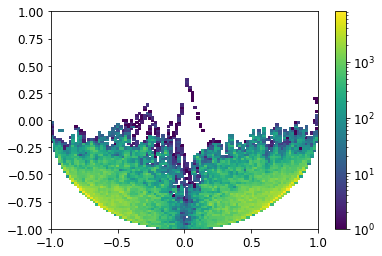

In [15]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

x = caloLike_calibration.array['dir_x_y'][caloLike_calibration.quality_mask].flatten()
y = caloLike_calibration.array['dir_y_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, range=[[-1, 1], [-1, 1]], bins=[101, 101], norm=LogNorm());
plt.colorbar()

In [24]:
caloLike_calibration.array['dir_y_y']

<JaggedArray [[0.0 -0.74133277 0.0 ... 0.0 0.0 0.0] [-0.5945011 -0.59927386 -0.5993049 ... -0.64937395 -0.6481412 -0.6484071] [-0.52000284 -0.52000284 -0.52000284 ... -0.52000284 -0.52000284 -0.52000284] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [-0.25089422 -0.25014514 -0.24979733 ... -0.36122605 -0.3610174 -0.36095187] [-0.61235225 -0.6123863 -0.6122133 ... -0.6709001 -0.671342 -0.6719527]] at 0x7fb8132c8e50>

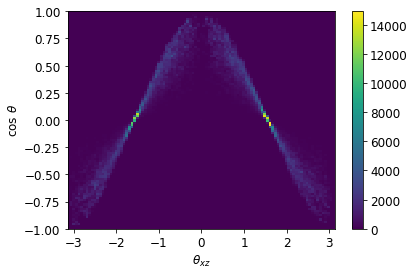

In [36]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

y = caloLike_calibration.array['dir_z_y'][caloLike_calibration.quality_mask].flatten()
x = caloLike_calibration.array['theta_xz_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, range=[[-np.pi, np.pi], [-1, 1]], bins=[101, 101]);
plt.ylabel(r'cos $\theta$')
plt.xlabel(r'$\theta_{xz}$')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.9)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_yz_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [-math.pi, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_yz')
plt.colorbar()

In [ ]:
x = caloLike_calibration.array['abs_theta_xz_y'][caloLike_calibration.quality_mask].flatten()
y = caloLike_calibration.array['abs_theta_yz_y'][caloLike_calibration.quality_mask].flatten()

plt.hist2d(x, y, bins=[100, 100], norm=LogNorm());
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.9)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [0, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_y')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_yx_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [-math.pi, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz')
plt.ylabel('theta_yx')
plt.colorbar()

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[101, 101], range=[[-math.pi, math.pi], [0, math.pi]], norm=LogNorm());
plt.xlabel('theta_xz_y')
plt.ylabel('theta_y_y')
plt.colorbar()
plt.savefig(save_folder + 'theta_y_y_vs_theta_xz_y.png', dpi=200)

In [ ]:
no_dir = (np.abs(caloLike_calibration.array['dir_z_y'])<0.1)

dir_z_plus = (caloLike_calibration.array['dir_z_y']> 0.8)
dir_z_minus = (caloLike_calibration.array['dir_z_y']< -0.9)
dir_x_plus = (caloLike_calibration.array['dir_x_y']> 0.9)
dir_x_minus = (caloLike_calibration.array['dir_x_y']< -0.9)
dir_y_plus = (caloLike_calibration.array['dir_y_y']> 0.9)
dir_y_minus = (caloLike_calibration.array['dir_y_y']< -0.9)

selection = caloLike_calibration.quality_mask

x = caloLike_calibration.array['abs_theta_xz_y'][selection].flatten()
y = caloLike_calibration.array['abs_theta_y_y'][selection].flatten()

plt.hist2d(x, y, bins=[21, 21], range=[[0, math.pi/2], [0, math.pi/2]], norm=LogNorm());
plt.xlabel('abs_theta_xz_y')
plt.ylabel('abs_theta_y_y')
plt.colorbar()
# plt.savefig(save_folder + 'abs_theta_y_y_vs_abs_theta_xz_y.png', dpi=200)

In [ ]:
array_used = caloLike_test.array
qual_mask = caloLike_test.quality_mask

In [ ]:
mask_thetay_pi2 = array_used['abs_theta_y_y'] == math.pi/2

In [ ]:
array_used['trk_start_z'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['trk_end_z'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['z_y'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array_used['dir_x_y'][qual_mask & mask_diry_1].flatten()

In [ ]:
array_used['dir_y_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
array_used['dir_z_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
array_used['pitch_y'][qual_mask & mask_thetay_pi2].flatten()

In [ ]:
mask_diry_1 = np.abs(array_used['dir_y_y']) == 1

In [ ]:
array_used['abs_theta_xz_y'][qual_mask & mask_diry_1.any()].flatten()

In [ ]:
array = array_mc_train
mask = selection_mask(array)

In [ ]:
array['evt'][~mask]

In [ ]:
array['run'][~mask]

In [ ]:
array['sub'][~mask]

In [ ]:
array['dir_x_y'][~mask]

In [ ]:
array['dir_y_y'][~mask]

In [ ]:
array['dir_z_y'][~mask]

In [ ]:
array['z_y'][~mask]

In [ ]:
array['trk_start_z'][~mask]

In [ ]:
array['trk_end_z'][~mask]

In [ ]:
aux = (np.abs(array['dir_pitch_y']) - array['pitch_y'])[~mask].flatten()
out = np.arctan(aux)
plt.hist(out, bins=100, log=True);
plt.xlabel('arctan(Pitch from direction - Pitch from calorimetry)')
plt.title('Events with bad quality')

In [ ]:
aux = (np.abs(array['dir_pitch_y']) - array['pitch_y'])[mask].flatten()
out = np.arctan(aux)
plt.hist(out, bins=100, log=True);
plt.xlabel('arctan(Pitch from direction - Pitch from calorimetry)')
plt.title('Events with good quality')

# Random checks

In [ ]:
np.isnan(caloLike_calibration.array_mc['dir_x_y']).any()

In [ ]:
caloLike_calibration.array['dedx_y'][-2]

In [ ]:
caloLike_calibration.array['rr_y'][-2]

In [ ]:
caloLike_calibration.array['pitch_y'][-2]

In [ ]:
ev_num = -2
print('evt', caloLike_calibration.array['evt'][ev_num])
print('run', caloLike_calibration.array['run'][ev_num])
print('sub', caloLike_calibration.array['sub'][ev_num])
print()
print('trk_start_x', caloLike_calibration.array['trk_start_x'][ev_num])
print('trk_start_y', caloLike_calibration.array['trk_start_y'][ev_num])
print('trk_start_z', caloLike_calibration.array['trk_start_z'][ev_num])
print()
print('trk_end_x', caloLike_calibration.array['trk_end_x'][ev_num])
print('trk_end_y', caloLike_calibration.array['trk_end_y'][ev_num])
print('trk_end_z', caloLike_calibration.array['trk_end_z'][ev_num])
print()
print()
print('x_y', caloLike_calibration.array['x_y'][ev_num])
print('y_y', caloLike_calibration.array['y_y'][ev_num])
print('z_y', caloLike_calibration.array['z_y'][ev_num])
print()
print()
print('x_u', caloLike_calibration.array['x_u'][ev_num])
print('y_u', caloLike_calibration.array['y_u'][ev_num])
print('z_u', caloLike_calibration.array['z_u'][ev_num])
print()
print()
print('x_v', caloLike_calibration.array['x_v'][ev_num])
print('y_v', caloLike_calibration.array['y_v'][ev_num])
print('z_v', caloLike_calibration.array['z_v'][ev_num])
print()
print()
print('dir_x_y', caloLike_calibration.array['dir_x_y'][ev_num])
print('dir_y_y', caloLike_calibration.array['dir_y_y'][ev_num])
print('dir_z_y', caloLike_calibration.array['dir_z_y'][ev_num])
print()
print()
print('dir_x_u', caloLike_calibration.array['dir_x_u'][ev_num])
print('dir_y_u', caloLike_calibration.array['dir_y_u'][ev_num])
print('dir_z_u', caloLike_calibration.array['dir_z_u'][ev_num])
print()
print()
print('dir_x_v', caloLike_calibration.array['dir_x_v'][ev_num])
print('dir_y_v', caloLike_calibration.array['dir_y_v'][ev_num])
print('dir_z_v', caloLike_calibration.array['dir_z_v'][ev_num])

## Old code

In [9]:
# file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v1_david/'

# filenames = {
#     'mc': file_folder + 'mc.root',
#     'data': file_folder + 'data.root',
# }

# split_factor = 0.05
# split_factor2 = 0.1

# folder = "nuselection"
# tree = "CalorimetryAnalyzer"

# root_file_mc = uproot.open(filenames['mc'])[folder][tree]
# entry_split_mc = int(len(root_file_mc) * split_factor)
# entry_split2_mc = int(len(root_file_mc) * split_factor2)
# array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
# array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc, entrystop=entry_split2_mc)

# root_file_data = uproot.open(filenames['data'])[folder][tree]
# entry_split2_data = int(len(root_file_data) * split_factor2)
# entry_split_data = int(len(root_file_data) * split_factor)
# array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
# array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data, entrystop=entry_split2_data)

In [10]:
# file_folder = '~/Desktop/MicroBooNE/calorimetry_likelihood/v1_david/'

# filenames = {
#     'mc': file_folder + 'mc.root',
#     'data': file_folder + 'data.root',
# }

# split_factor = 0.45

# folder = "nuselection"
# tree = "CalorimetryAnalyzer"

# root_file_mc = uproot.open(filenames['mc'])[folder][tree]
# entry_split_mc = int(len(root_file_mc) * split_factor)
# array_mc_train = root_file_mc.arrays(branches, namedecode="utf-8", entrystop=entry_split_mc)
# array_mc_test = root_file_mc.arrays(branches, namedecode="utf-8", entrystart=entry_split_mc)

# root_file_data = uproot.open(filenames['data'])[folder][tree]
# entry_split_data = int(len(root_file_data) * split_factor)
# array_data_train = root_file_data.arrays(branches, namedecode="utf-8", entrystop=entry_split_data)
# array_data_test = root_file_data.arrays(branches, namedecode="utf-8", entrystart=entry_split_data)

In [121]:
(abs(array_mc_train['norm_dir_y'] -1) > 0.001).sum().sum()

0

In [127]:
(abs(array_data_train['norm_dir_y'] -1) > 0.01).sum().sum()/(abs(array_data_train['norm_dir_y'] -1) >= 0).sum().sum()

0.11371011357490536

In [136]:
mask = (abs(array_data_train['norm_dir_y'] -1) > 0.001).any()

In [140]:
array_data_train['pitch_y'][mask]

<JaggedArray [[3.9734833 3.795518 3.8490105 ... 5.1875334 6.4419236 6.5536213] [1.0544255 1.0573634 1.0590749 ... 1.12592 1.1234745 1.1198924] [0.3954863 0.3955876 0.39570147 ... 0.41052893 0.41065794 0.4107967] ... [0.3617974 0.3617974 0.3617974 ... 0.49655968 0.49655968 0.49655968] [1.1054138 1.1040484 1.1052866 ... 0.7904888 0.7891403 0.78851956] [0.6853262 0.7044401 0.717695 ... 5.1093516 5.8202634 6.6827726]] at 0x7f807fe2ebd0>

In [141]:
array_data_train['norm_dir_y'][mask]

<JaggedArray [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [1.7361596e-06 1.7361596e-06 1.7361596e-06 ... 1.7361596e-06 1.7361596e-06 1.7361596e-06] [999.0 999.0 999.0 ... 999.0 999.0 999.0] ... [1412.7993 1412.7993 1412.7993 ... 1412.7993 1412.7993 1412.7993] [inf inf inf ... inf inf inf] [1412.7993 1412.7993 1412.7993 ... 1412.7993 1412.7993 1412.7993]] at 0x7f809335ecd0>

In [137]:
array_data_train['dir_x_y'][mask]

<JaggedArray [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0] ... [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0] [inf inf inf ... inf inf inf] [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0]] at 0x7f7da666f410>

In [138]:
array_data_train['dir_y_y'][mask]

<JaggedArray [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [1.7361596e-06 1.7361596e-06 1.7361596e-06 ... 1.7361596e-06 1.7361596e-06 1.7361596e-06] [0.053039305 0.053039305 0.053039305 ... 0.053039305 0.053039305 0.053039305] ... [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [-999.0 -999.0 -999.0 ... -999.0 -999.0 -999.0]] at 0x7f807fe2e350>

In [139]:
array_data_train['dir_z_y'][mask]

<JaggedArray [[0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] ... [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0] [0.0 0.0 0.0 ... 0.0 0.0 0.0]] at 0x7f8188bed510>